### 1. Описание набора данных

Набор данных ```German Credit``` содержит сведения о людях, которые берют кредит в банке, где каждый человек классифицируется как хороший или плохой заемщик (кредитный риск).

### 2. Импорт библиотек

In [ ]:
import logging
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import urllib.request
import warnings

from sklearn.preprocessing import PowerTransformer, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
# from sklearn.ensemble import HistGradientBoostingClassifier
# from sklearn.metrics import (classification_report,
#                              accuracy_score,
#                              recall_score,
#                              f1_score,
#                              roc_auc_score,
#                              confusion_matrix,
#                              mean_squared_error,
#                              )
# from sklearn.inspection import permutation_importance

# from catboost import CatBoostClassifier

# import optuna

# import matplotlib.pyplot as plt


In [ ]:
warnings.filterwarnings('ignore')
logging.getLogger('matplotlib').setLevel(logging.ERROR)

### 3. Определение функций

In [46]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

NameError: name 'columns' is not defined

### 4. Создание каталога и скачивание данных

In [ ]:
if not os.path.exists('data'):
  os.makedirs('data')

if not os.path.exists('data/german_credit.csv'):
  urllib.request.urlretrieve('https://raw.githubusercontent.com/Losyash/mbml_II_hw/refs/heads/main/lab3/data/german_credit.csv', 'data/german_credit.csv')

### 5. Загрузка набора данных из файла

In [ ]:
df = pd.read_csv('data/german_credit.csv')
df.head()

,Creditability,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,...,Duration in Current address,Most valuable available asset,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker
0,1,1,18,4,2,1049,1,2,4,2,...,4,2,21,3,1,1,3,1,1,1
1,1,1,9,4,0,2799,1,3,2,3,...,2,1,36,3,1,2,3,2,1,1
2,1,2,12,2,9,841,2,4,2,2,...,4,1,23,3,1,1,2,1,1,1
3,1,1,12,4,0,2122,1,3,3,3,...,2,1,39,3,1,2,2,2,1,2
4,1,1,12,4,0,2171,1,3,4,3,...,4,2,38,1,2,2,2,1,1,2


### 6. Предварительный анализ и обработка данных данных

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Creditability                      1000 non-null   int64
 1   Account Balance                    1000 non-null   int64
 2   Duration of Credit (month)         1000 non-null   int64
 3   Payment Status of Previous Credit  1000 non-null   int64
 4   Purpose                            1000 non-null   int64
 5   Credit Amount                      1000 non-null   int64
 6   Value Savings/Stocks               1000 non-null   int64
 7   Length of current employment       1000 non-null   int64
 8   Instalment per cent                1000 non-null   int64
 9   Sex & Marital Status               1000 non-null   int64
 10  Guarantors                         1000 non-null   int64
 11  Duration in Current address        1000 non-null   int64
 12  Most valuable availab

#### 6.1. Разделение набора данных на набор с признаками и целефой переменной

In [ ]:
X, y = df.drop(columns = ['Creditability']), df['Creditability']

#### 6.2. Вывод гистограмм распределения признаков

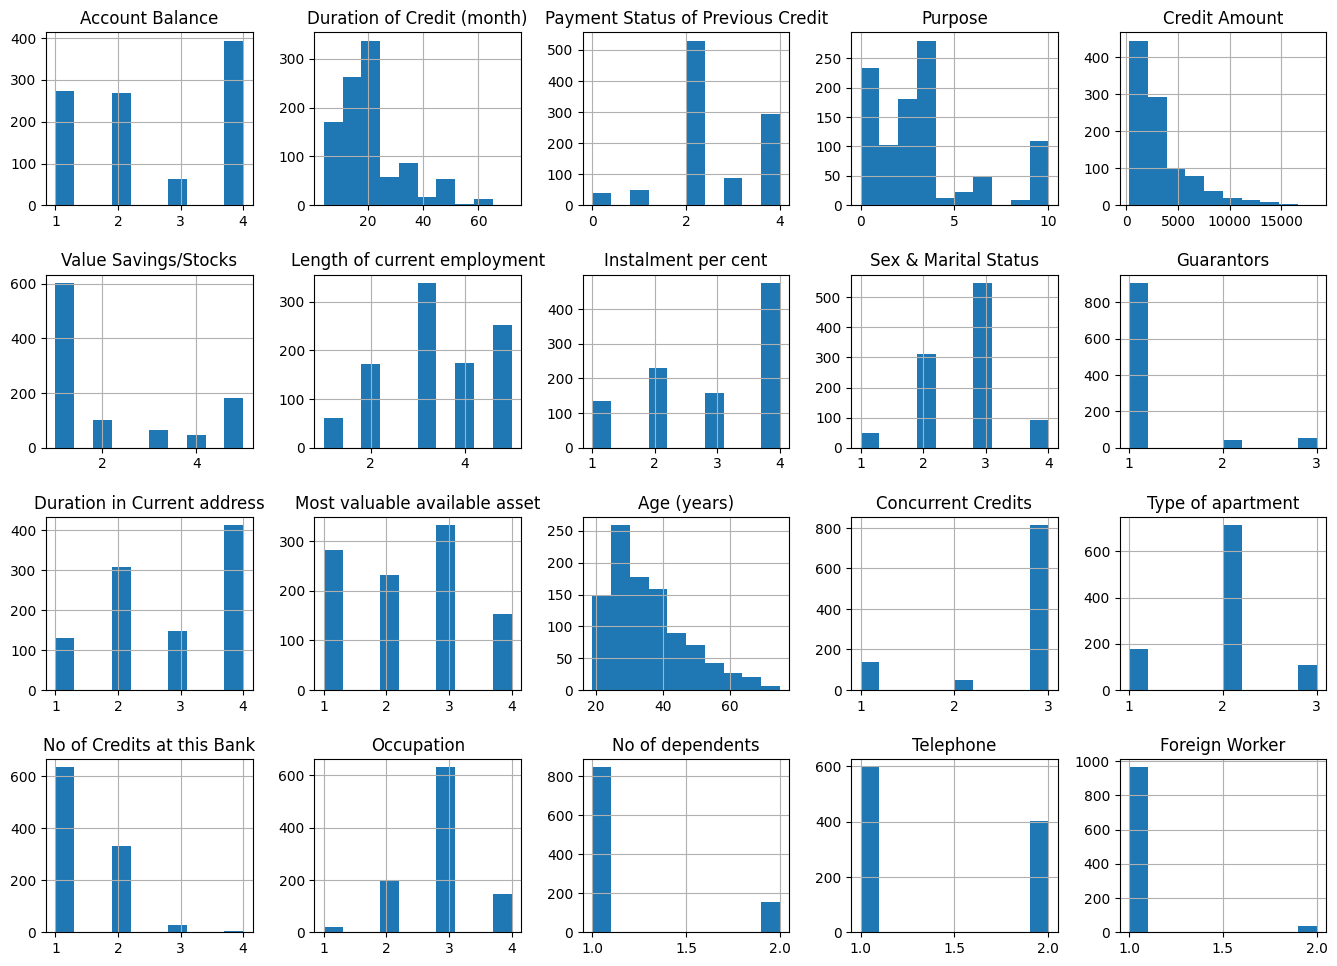

In [ ]:
num_rows = 4
num_columns = 5

fig, axes = plt.subplots(nrows=num_rows, ncols=num_columns, figsize=(16, 10))

for i, column in enumerate(X.columns):
  row = i // num_columns
  col = i % num_columns

  X[column].hist(ax=axes[row, col], bins=10)
  axes[row, col].set_title(column)

plt.subplots_adjust(left=0, right=0.8, bottom=0, top=0.9, wspace=0.3, hspace=0.4)
plt.show()

#### 6.3. Выделение категориальных и числовых признаков

In [ ]:
categorical_columns = [
  'Account Balance',
  'Concurrent Credits',
  'Duration in Current address',
  'Foreign Worker',
  'Guarantors',
  'Instalment per cent',
  'Length of current employment',
  'Most valuable available asset',
  'No of Credits at this Bank',
  'No of dependents',
  'Occupation',
  'Payment Status of Previous Credit',
  'Purpose',
  'Sex & Marital Status',
  'Telephone',
  'Type of apartment',
  'Value Savings/Stocks'
]

numeric_columns = [
  'Age (years)',
  'Credit Amount',
  'Duration of Credit (month)'
]

#### 6.4. Масштабирование числовых признаков

In [ ]:
scaler = StandardScaler()

data_scaled = scaler.fit_transform(X[numeric_columns])
df_scaled = pd.DataFrame(data_scaled, columns=numeric_columns)

df_processed = pd.concat([X.drop(columns=numeric_columns), df_scaled], axis=1)

#### 6.5. Отображение числовых признаков в гауссово распределение

In [ ]:
transformer = PowerTransformer(method='yeo-johnson')

data_transformed = transformer.fit_transform(df_scaled)
df_transformed = pd.DataFrame(data_transformed, columns=df_scaled.columns)

df_processed = pd.concat([X.drop(columns=numeric_columns), df_transformed], axis=1)

### 7. Выдвижение начальных гипотез

#### 7.1. Расчет коэффициента корреляции Пирсона

In [ ]:
correlations = df_processed[numeric_columns].corrwith(y)
correlations

Age (years)                   0.109702
Credit Amount                -0.103795
Duration of Credit (month)   -0.213698
dtype: float64

Корреляция не высока, но логична:
- чем меньше срок и величина кредита, тем вероятней одобрят кредит,
- чем старше заемщик, тем менее вероятно одобрят кредит.

Для анализа корреляции между категориальными переменными и целевой переменой воспользуемся коэффициентом Cramer's V, который является статистической мерой, используемой для оценки степени ассоциации между двумя категориальными переменными. Значение коэффициента Cramer's V варьируется от 0 до 1, где 0 указывает на отсутствие ассоциации, а 1 на сильную ассоциацию.

In [ ]:

for column in categorical_columns:
    cramers_v_result = cramers_v(df_processed[column], y)
    print(f"{column:<35} {cramers_v_result:.2f}")

In [ ]:
# Функция cramers_col применяет cramers_v к каждой паре переменных в наборе,
# создавая новый набор данных, где каждый столбец соответствует одной из
# исходных категориальных переменных, а значения в каждом столбце представляют
# собой Cramer's V для пары этой переменной с каждой из других переменных.
def cramers_col(column_name):
    col = pd.Series(np.empty(X[category_columns].columns.shape), index=X[category_columns].columns, name=column_name)
    for row in X[category_columns]:
        cram = cramers_v(X[category_columns][column_name], X[category_columns][row])
        col[row] = round(cram, 2)
    return col

# Вычисление Cramer's V для всех пар категориальных переменных
cramers_df = X[category_columns].apply(lambda column: cramers_col(column.name))

# Вывод результатов
# Выведем тепловую карту для cramers_df
plt.figure(figsize=(10, 8)) # Установка размера фигуры
sns.heatmap(cramers_df, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Тепловая карта коэффициента Cramer\'s V') # Заголовок тепловой карты
plt.show() # Отображение тепловой карты

`Duration of Credit (month)`, `Account Balance`, `Payment Status of Previous Credit` могут быть наиболее полезны для решения поставленной задачи.

Наименее полезными могут быть следующие признаки:
- Instalment per cent
- Sex & Marital Status
- Guarantors
- Duration in Current address
- No of Credits at this Bank
- Occupation
- No of dependents
- Telephone
- Foreign Worker

Отметим, что `Most valuable available asset` довольно сильно коррелирует с `Type of apartment` (тут можно сделать предположение, что так как `Type of apartment` относится к типу жилья, в котором проживает заемщик, а `Most valuable available asset` к наиболее ценному доступному активу, то логично, что обладание более дорогими жилищными условиями в свою очередь, может отражаться в наиболее ценных активах.)

Также сильно коррелируют между собой `Payment Status of Previous Credit` и `No of Credits at this Bank`, `Occupation` и `Telephone`.

Возможно, какие-то из этих пар признаков можно заменить одним, что уменьшит размерность данных, и, вероятно, положительно скажется на обучении модели.

### 8. Разделение данных на тренировочный и тестовые

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_processed, y, test_size=0.25, random_state=42)

NameError: name 'train_test_split' is not defined

# Выбор моделей для классификации

## Выбор ансамблевой модели из scikit-learn

Предложенные в условии задания модели scikit-learn:
- `случайный лес`,
- `градиентный бустинг`,
- `градиентный бустинг основанный на гистограммах`.

Для задачи классификации на наборе данных "German Credit Data" лучше выбрать `модель градиентного бустинга на основе гистограмм`, так как она обеспечивает высокую скорость обучения и предсказания.

Эта модель использует гистограммы для ускорения процесса обучения, что делает её значительно быстрее по сравнению с традиционным градиентным бустингом.

В отличие от `случайного леса`, который также является эффективным ансамблевым методом, `модель градиентного бустинга на основе гистограмм` может обеспечить более высокую точность и эффективность. Но, стоит отметить, `случайный лес` может быть более простым в интерпретации и настройке по сравнению с градиентным бустингом.

## Выбор ансамблевой «внешней» модели

Предложенные в условии задания "внешние" модели:
- градиентный бустинг `CatBoost`,
- градиентный бустинг `XGBoost`,
- градиентный бустинг `LightGBM`.

Для выбора модели из указанных для классификации набора данных "German Credit Data", следует учесть следующее:

- **Обработка категориальных признаков**: `CatBoost` имеет встроенную поддержку категориальных признаков. Это особенно полезно для набора данных "German Credit Data", в котором 17 категориальных признаков.

- **Скорость обучения и предсказания**: `LightGBM` известен своей высокой скоростью обучения и предсказания. Это полезно, когда время обучения ограниченно.

- **Производительность и гибкость**: `CatBoost` и `XGBoost` предлагают высокую производительность и гибкость в настройке гиперпараметров. Но `CatBoost` может предложить лучшие результаты по умолчанию, это полезно для быстрого получения хороших результатов без глубокой настройки.

Исходя из вышесказанного, `CatBoost` наиболее предпочтителен для классификации набора данных "German Credit Data". Он предлагает встроенную поддержку категориальных признаков и может обеспечить хорошие результаты по умолчанию для быстрого получения хороших результатов без глубокой настройки.

# Обучение базовой (baseline) модели

Это самая «простая» модель - только числовые признаки, гиперпараметры модели по умолчанию.

In [ ]:
# Используем только числовые признаки для обучения модели
X_train_numeric = X_train[numeric_columns]
X_test_numeric = X_test[numeric_columns]

## Градиентный бустинг основанный на гистограммах из scikit-learn

In [ ]:
# Создание и обучение модели
model_hist = HistGradientBoostingClassifier(random_state=42)
model_hist.fit(X_train_numeric, y_train)

HistGradientBoostingClassifier(random_state=42)

In [ ]:
# Предсказание на тренировочной и валидационной выборках
y_train_pred_hist = model_hist.predict(X_train_numeric)
y_test_pred_hist = model_hist.predict(X_test_numeric)

### Анализ метрик на тренировочных и валидационных данных

In [ ]:
train_accuracy = accuracy_score(y_train, y_train_pred_hist)
test_accuracy = accuracy_score(y_test, y_test_pred_hist)
print(f'Точность на тренировочной выборке: {train_accuracy:.3f}')
print(f'Точность на валидационной выборке: {test_accuracy:.3f}')
print()
train_recall = recall_score(y_train, y_train_pred_hist)
test_recall = recall_score(y_test, y_test_pred_hist)
print(f'Полнота на тренировочной выборке: {train_recall:.3f}')
print(f'Полнота на валидационной выборке: {test_recall:.3f}')
print()
train_f1 = f1_score(y_train, y_train_pred_hist)
test_f1 = f1_score(y_test, y_test_pred_hist)
print(f'F-мера на тренировочной выборке: {train_f1:.3f}')
print(f'F-мера на валидационной выборке: {test_f1:.3f}')
print()
train_roc_auc = roc_auc_score(y_train, y_train_pred_hist)
test_roc_auc = roc_auc_score(y_test, y_test_pred_hist)
print(f'ROC AUC на тренировочной выборке: {train_roc_auc:.3f}')
print(f'ROC AUC на валидационной выборке: {test_roc_auc:.3f}')

Точность на тренировочной выборке: 0.933
Точность на валидационной выборке: 0.668

Полнота на тренировочной выборке: 0.979
Полнота на валидационной выборке: 0.794

F-мера на тренировочной выборке: 0.954
F-мера на валидационной выборке: 0.770

ROC AUC на тренировочной выборке: 0.903
ROC AUC на валидационной выборке: 0.584


#### Текущие выводы

Эти результаты указывают на то, что модель хорошо работает на тренировочных данных, но ее производительность на новых данных снижается. Это может быть связано с переобучением модели.

Если сравнивать с моделью из [домашнего задания №1](https://colab.research.google.com/drive/1vOCDQNlQitBE9cQQF1_xemsU8OiOavgz?usp=sharing), где был применен `метод опорных векторов`:
- точность на валидационных данных несколько меньше: 0.668 против 0.716,
- полнота также меньше: 0.79 против 0.98,
- F-мера тоже меньше: 0.77 против 0.83,
- ROC AUC немного вырос: 0.58 против 0.54.


### Отчет классификации на валидационной выборке

In [ ]:
print("Отчет классификации на валидационной выборке:")
print(classification_report(y_test, y_test_pred_hist))

Отчет классификации на валидационной выборке:
              precision    recall  f1-score   support

           0       0.44      0.37      0.40        75
           1       0.75      0.79      0.77       175

    accuracy                           0.67       250
   macro avg       0.59      0.58      0.59       250
weighted avg       0.65      0.67      0.66       250



#### Текущие выводы

Эти результаты указывают на то, что модель имеет более высокую производительность для класса 1, но значительно хуже для класса 0. Это может быть связано с несбалансированностью классов в данных (что, как мы знаем из [первого домашнего задания](https://colab.research.google.com/drive/1vOCDQNlQitBE9cQQF1_xemsU8OiOavgz?usp=sharing), имеет место быть) или с тем, что модель не справляется с определением истинных наблюдений класса 0.

### Анализ матрицы ошибок

In [ ]:
cm = confusion_matrix(y_test, y_test_pred_hist)

print("Матрица ошибок:")
display(cm)
print()

tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred_hist).ravel()
print('истинно отрицательные (True Negatives, TN)\t', tn)
print('ложно положительные (False Positives, FP)\t', fp)
print('ложно отрицательные (False Negatives, FN)\t', fn)
print('истинно положительные (True Positives, TP)\t', tp)

Матрица ошибок:


array([[ 28,  47],
       [ 36, 139]])


истинно отрицательные (True Negatives, TN)	 28
ложно положительные (False Positives, FP)	 47
ложно отрицательные (False Negatives, FN)	 36
истинно положительные (True Positives, TP)	 139


Для сравнения матрица ошибок из [первого домашнего задания](https://colab.research.google.com/drive/1vOCDQNlQitBE9cQQF1_xemsU8OiOavgz?usp=sharing):  
истинно отрицательные (True Negatives, TN)	 7  
ложно положительные (False Positives, FP)	 68  
ложно отрицательные (False Negatives, FN)	 3  
истинно положительные (True Positives, TP)	 172

#### Текущие выводы

Можно отметить, что `градиентный бустинг` также имеет более хорошую способность предсказывать положительные случаи, но имеет проблемы с отрицательными, часто ошибаясь при их предсказании, как и `метод опорных векторов`.

Но `градиентный бустинг` лучше справляется с предсказаниями отрицательных случаев (TN 28 против 7), но хуже с предсказаниями положительных случаев (TP 139 против 172).

### Анализ значимости признаков

Поскольку у модели `HistGradientBoostingClassifier` из библиотеки scikit-learn нет атрибута `feature_importances_`, то для оценки важности признаков воспользуемся альтернативным подходом - перестановочным (permutation) методом. Этот метод случайно переставляет значения одного признака и измеряет, как это влияет на производительность модели. Если производительность значительно ухудшается, признак считается важным.

In [ ]:
# Вычисление важности признаков с помощью перестановочного метода
result = permutation_importance(model_hist, X_test_numeric, y_test, n_repeats=10, random_state=42)

# Вывод важности признаков
for i in result.importances_mean.argsort()[::-1]:
    if result.importances_mean[i] - 2 * result.importances_std[i] > 0:
        print(f"{numeric_columns[i]}: "
              f"{result.importances_mean[i]:.3f}"
              f" +/- {result.importances_std[i]:.3f}")

Duration of Credit (month): 0.044 +/- 0.018
Credit Amount: 0.036 +/- 0.013


#### Текущие выводы

Получаем, что при случайной перестановке значений признака "Duration of Credit (month)" модель потеряла бы примерно 4.4% своей производительности, а при перестановке значений признака "Credit Amount" - примерно 3.6%. Значения "+/- 1.8" и "+/- 1.3" указывают на стандартное отклонение оценок важности признаков, что позволяет оценить неопределенность в этих оценках.

"Duration of Credit (month)" имеет более высокую важность, чем "Credit Amount", что может указывать на то, что продолжительность кредита имеет более значительное влияние на кредитоспособность по сравнению с суммой кредита. Возраст "Age (years)" получается вообще не влияет на кредитоспособность.

Однако, важно помнить, что важность признаков, полученная с помощью перестановочного метода, зависит от производительности модели и может быть искажена, если модель переобучена или если признаки сильно коррелируют между собой. В таких случаях, важность признаков может быть переоценена или недооценена. Кроме того, перестановочная важность признаков не отражает встроенную важность признака в модели, а лишь показывает, насколько сильно модель зависит от этого признака для предсказания.

На основе этих значений важности признаков можно понять, какие признаки наиболее важны для модели и как они влияют на ее производительность. Это может помочь в дальнейшем улучшении модели путем выбора подходящих признаков для обучения или в понимании, какие признаки могут быть наиболее полезны для улучшения качества предсказаний.

## CatBoost

In [ ]:
# Создание и обучение модели
model_cb = CatBoostClassifier(verbose=False, random_state=42)
model_cb.fit(X_train_numeric, y_train, verbose=False)

In [ ]:
# Предсказание на тренировочной и валидационной выборках
y_train_pred_cb = model_cb.predict(X_train_numeric)
y_test_pred_cb = model_cb.predict(X_test_numeric)

### Анализ метрик на тренировочных и валидационных данных

In [ ]:
train_accuracy = accuracy_score(y_train, y_train_pred_cb)
test_accuracy = accuracy_score(y_test, y_test_pred_cb)
print(f'Точность на тренировочной выборке: {train_accuracy:.3f}')
print(f'Точность на валидационной выборке: {test_accuracy:.3f}')
print()
train_recall = recall_score(y_train, y_train_pred_cb)
test_recall = recall_score(y_test, y_test_pred_cb)
print(f'Полнота на тренировочной выборке: {train_recall:.3f}')
print(f'Полнота на валидационной выборке: {test_recall:.3f}')
print()
train_f1 = f1_score(y_train, y_train_pred_cb)
test_f1 = f1_score(y_test, y_test_pred_cb)
print(f'F-мера на тренировочной выборке: {train_f1:.3f}')
print(f'F-мера на валидационной выборке: {test_f1:.3f}')
print()
train_roc_auc = roc_auc_score(y_train, y_train_pred_cb)
test_roc_auc = roc_auc_score(y_test, y_test_pred_cb)
print(f'ROC AUC на тренировочной выборке: {train_roc_auc:.3f}')
print(f'ROC AUC на валидационной выборке: {test_roc_auc:.3f}')

Точность на тренировочной выборке: 0.831
Точность на валидационной выборке: 0.724

Полнота на тренировочной выборке: 0.989
Полнота на валидационной выборке: 0.937

F-мера на тренировочной выборке: 0.891
F-мера на валидационной выборке: 0.826

ROC AUC на тренировочной выборке: 0.725
ROC AUC на валидационной выборке: 0.582


Для сравнения метрики градиентного бустинга:

Точность на тренировочной выборке: 0.933  
Точность на валидационной выборке: 0.668

Полнота на тренировочной выборке: 0.979  
Полнота на валидационной выборке: 0.794

F-мера на тренировочной выборке: 0.954  
F-мера на валидационной выборке: 0.770

ROC AUC на тренировочной выборке: 0.903  
ROC AUC на валидационной выборке: 0.584

#### Текущие выводы

Эти результаты указывают на то, что модель `CatBoost` аналогично `градиентному бустингу от sklearn` хорошо работает на тренировочных данных, но ее производительность на новых данных снижается. Это, опять же, может быть связано с переобучением модели.

Если сравнивать с `градиентным бустингом от sklearn`:
- точность на валидационных данных несколько выше: 0.668 против 0.724, что незначительно выше результата `метода опорных векторов` из первого домашнего задания 0.716,
- полнота также выше: 0.79 против 0.94, но меньше `метода опорных векторов` 0.98,
- F-мера тоже выше: 0.77 против 0.83, что соответствует `методу опорных векторов`,
- ROC AUC аналогный: 0.58.


### Отчет классификации на валидационной выборке

In [ ]:
print("Отчет классификации на валидационной выборке:")
print(classification_report(y_test, y_test_pred_cb))

Отчет классификации на валидационной выборке:
              precision    recall  f1-score   support

           0       0.61      0.23      0.33        75
           1       0.74      0.94      0.83       175

    accuracy                           0.72       250
   macro avg       0.67      0.58      0.58       250
weighted avg       0.70      0.72      0.68       250



Для сравнения отчет классификации на валидационной выборке градиентного бустинга:  
```
                precision    recall  f1-score   support

           0       0.44      0.37      0.40        75
           1       0.75      0.79      0.77       175

    accuracy                           0.67       250
   macro avg       0.59      0.58      0.59       250
weighted avg       0.65      0.67      0.66       250
```

#### Текущие выводы

Сравнивая отчеты классификации для моделей `CatBoost` и `HistGradientBoostingClassifier` на валидационной выборке, можно сделать следующие выводы:

- **Точность (Accuracy)**: Модель `CatBoost` показывает общую точность 0.72, в то время как `HistGradientBoostingClassifier` показывает 0.67. Это указывает на то, что `CatBoost` лучше справляется с обнаружением правильных классов на валидационной выборке.

- **Полнота (Recall)**: Для класса 0 полнота `CatBoost` составляет 0.23, в то время как для `HistGradientBoostingClassifier` — 0.37. Для класса 1 полнота `CatBoost` составляет 0.94, в то время как для `HistGradientBoostingClassifier` — 0.79. Это указывает на то, что `CatBoost` лучше справляется с обнаружением положительных случаев класса 1, но хуже с обнаружением положительных случаев класса 0.

- **F-мера (F1 Score)**: F-мера для класса 0 у `CatBoost` составляет 0.33, в то время как для `HistGradientBoostingClassifier` — 0.40. Для класса 1 F-мера у `CatBoost` составляет 0.83, в то время как для `HistGradientBoostingClassifier` — 0.77. Это указывает на то, что `CatBoost` лучше справляется с балансированием между точностью и полнотой для класса 1, но хуже для класса 0.

- **Средние значения (Macro Average, Weighted Average)**: Macro Average у `CatBoost` составляет 0.67, в то время как для `HistGradientBoostingClassifier` — 0.59. Weighted Average у `CatBoost` составляет 0.70, в то время как для `HistGradientBoostingClassifier` — 0.65. Это указывает на то, что `CatBoost` лучше справляется с обнаружением положительных случаев класса 1, но хуже с обнаружением положительных случаев класса 0, учитывая вес классов.

В целом, эти результаты указывают на то, что модель `CatBoost` лучше справляется с задачей классификации на валидационной выборке, особенно для класса 1. Однако, для класса 0 производительность `CatBoost хуже`, чем у `HistGradientBoostingClassifier`. Это может быть связано с различиями в алгоритмах обучения и предсказания этих моделей.

### Анализ матрицы ошибок

In [ ]:
cm = confusion_matrix(y_test, y_test_pred_cb)

print("Матрица ошибок:")
display(cm)
print()

tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred_cb).ravel()
print('истинно отрицательные (True Negatives, TN)\t', tn)
print('ложно положительные (False Positives, FP)\t', fp)
print('ложно отрицательные (False Negatives, FN)\t', fn)
print('истинно положительные (True Positives, TP)\t', tp)

Матрица ошибок:


array([[ 17,  58],
       [ 11, 164]])


истинно отрицательные (True Negatives, TN)	 17
ложно положительные (False Positives, FP)	 58
ложно отрицательные (False Negatives, FN)	 11
истинно положительные (True Positives, TP)	 164


Для сравнение матрица ошибок модели sklearn:
```
array([[ 28,  47],
       [ 36, 139]])

истинно отрицательные (True Negatives, TN)	 28
ложно положительные (False Positives, FP)	 47
ложно отрицательные (False Negatives, FN)	 36
истинно положительные (True Positives, TP)	 139
```

#### Текущие выводы

Можно отметить, что `CatBoost` также имеет более хорошую способность предсказывать положительные случаи, но имеет проблемы с отрицательными, часто ошибаясь при их предсказании, как и `метод опорных векторов`, и модель от sklearn.

Но `CatBoost` хуже справляется с предсказаниями отрицательных случаев (TN 17 против 28), но лучше с предсказаниями положительных случаев (TP 164 против 139), чем `градиентный бустинг`.

### Анализ значимости признаков

`PredictionValuesChange` показывает, насколько изменились предсказания модели при изменении значения признака.

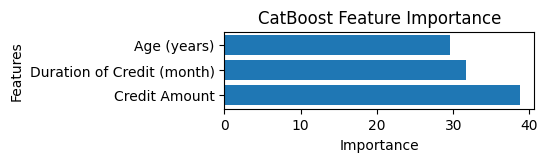

In [ ]:
# Получение важности признаков
importances = model_cb.get_feature_importance(type='PredictionValuesChange')

# Создание pandas Series для удобства визуализации
feature_importances = pd.Series(importances, index=X_train_numeric.columns).sort_values(ascending=False)

# Визуализация важности признаков
plt.figure(figsize=(4, 1))
plt.barh(feature_importances.index, feature_importances.values)
plt.title('CatBoost Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

#### Текущие выводы

В случае `CatBoost` "Duration of Credit (month)" имеет менее высокую важность, чем "Credit Amount", в отличии от модели sklearn.

В `CatBoost` возраст "Age (years)" играет значительную роль для принятия решения.

# Попытка улучшить качество модели

## Градиентный бустинг основанный на гистограммах из scikit-learn

### Добавление в модель категориальных признаков

In [ ]:
# Определение индексов категориальных признаков
categorical_features_indices = [X_train.columns.get_loc(c) for c in category_columns]

In [ ]:
# Создание и обучение модели с категориальными признаками
model_hist_with_cat = HistGradientBoostingClassifier(categorical_features=categorical_features_indices, random_state=42)
model_hist_with_cat.fit(X_train, y_train)

# Предсказание на тренировочной и валидационной выборках
y_train_pred_hist_with_cat = model_hist_with_cat.predict(X_train)
y_test_pred_hist_with_cat = model_hist_with_cat.predict(X_test)

#### Анализ полученного решения

In [ ]:
train_accuracy = accuracy_score(y_train, y_train_pred_hist_with_cat)
test_accuracy = accuracy_score(y_test, y_test_pred_hist_with_cat)
print(f'Точность на тренировочной выборке: {train_accuracy:.3f}')
print(f'Точность на валидационной выборке: {test_accuracy:.3f}')
print()
train_recall = recall_score(y_train, y_train_pred_hist_with_cat)
test_recall = recall_score(y_test, y_test_pred_hist_with_cat)
print(f'Полнота на тренировочной выборке: {train_recall:.3f}')
print(f'Полнота на валидационной выборке: {test_recall:.3f}')
print()
train_f1 = f1_score(y_train, y_train_pred_hist_with_cat)
test_f1 = f1_score(y_test, y_test_pred_hist_with_cat)
print(f'F-мера на тренировочной выборке: {train_f1:.3f}')
print(f'F-мера на валидационной выборке: {test_f1:.3f}')
print()
train_roc_auc = roc_auc_score(y_train, y_train_pred_hist_with_cat)
test_roc_auc = roc_auc_score(y_test, y_test_pred_hist_with_cat)
print(f'ROC AUC на тренировочной выборке: {train_roc_auc:.3f}')
print(f'ROC AUC на валидационной выборке: {test_roc_auc:.3f}')
print()

cm = confusion_matrix(y_test, y_test_pred_hist_with_cat)
print('-' * 40)
print("Матрица ошибок:")
display(cm)
print()

tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred_hist_with_cat).ravel()
print('истинно отрицательные (True Negatives, TN)\t', tn)
print('ложно положительные (False Positives, FP)\t', fp)
print('ложно отрицательные (False Negatives, FN)\t', fn)
print('истинно положительные (True Positives, TP)\t', tp)
print()

# Вычисление важности признаков с помощью перестановочного метода
result = permutation_importance(model_hist_with_cat, X_test, y_test, n_repeats=10, random_state=42)
print('-' * 40)
# Вывод важности признаков
print('Важность признаков:')
for i in result.importances_mean.argsort()[::-1]:
    if result.importances_mean[i] - 2 * result.importances_std[i] > 0:
        print(f"{list(X_test.columns)[i]}: "
              f"{result.importances_mean[i]:.3f}"
              f" +/- {result.importances_std[i]:.3f}")

Точность на тренировочной выборке: 1.000
Точность на валидационной выборке: 0.772

Полнота на тренировочной выборке: 1.000
Полнота на валидационной выборке: 0.869

F-мера на тренировочной выборке: 1.000
F-мера на валидационной выборке: 0.842

ROC AUC на тренировочной выборке: 1.000
ROC AUC на валидационной выборке: 0.708

----------------------------------------
Матрица ошибок:


array([[ 41,  34],
       [ 23, 152]])


истинно отрицательные (True Negatives, TN)	 41
ложно положительные (False Positives, FP)	 34
ложно отрицательные (False Negatives, FN)	 23
истинно положительные (True Positives, TP)	 152

----------------------------------------
Важность признаков:
Account Balance: 0.068 +/- 0.017
Duration of Credit (month): 0.042 +/- 0.013
Credit Amount: 0.038 +/- 0.014
No of Credits at this Bank: 0.012 +/- 0.003


Отметим, что после добавления категориальных признаков на тренировочных данных модель отрабатывает по максимуму, что говорит скорее всего о переобучении.

На валидационных данных:
- точность возросла с 0.67 до 0.77,
- полнота возросла с 0.79 до 0.87,
- F-мера возрасла с 0.77 до 0.84,
- ROC AUC существнно вырос с 0.58 до 0.71.

Матрица ошибок также показывает улучшение модели как в опрделении положительных случаев, так и отрицательных.

К значимым признакам добавились `Account Balance`, который теперь является самым важным, и `No of Credits at this Bank`, который обладает какой-то минимальной важностью.

Таким образом, добавление категориальных признаков существенно улучшило модель.

### Попытка оптимизировать гиперпараметры модели

In [ ]:
# Определение гиперпараметров для поиска
param_grid = {
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5, 7],
    'min_samples_leaf': [10, 20, 30],
    'max_leaf_nodes': [30, 50, 70]
}

# Создание экземпляра GridSearchCV
grid_search = GridSearchCV(model_hist_with_cat, param_grid, cv=5, scoring='accuracy')

# Обучение модели с использованием поиска по сетке
grid_search.fit(X_train, y_train)

# Вывод наилучших параметров
print("Best parameters: ", grid_search.best_params_)

# Вывод наилучшей точности
print("Best accuracy: ", grid_search.best_score_)

Best parameters:  {'learning_rate': 0.1, 'max_depth': 7, 'max_leaf_nodes': 30, 'min_samples_leaf': 10}
Best accuracy:  0.764


In [ ]:
# Создание и обучение модели с оптимизированными параметрами
model_hist_opt = HistGradientBoostingClassifier(
    categorical_features=categorical_features_indices,
    learning_rate=0.1,
    max_depth=7,
    max_leaf_nodes=30,
    min_samples_leaf=10,
    random_state=42)
model_hist_opt.fit(X_train, y_train)

# Предсказание на тренировочной и валидационной выборках
y_train_pred_hist_opt = model_hist_opt.predict(X_train)
y_test_pred_hist_opt = model_hist_opt.predict(X_test)

#### Анализ полученного решения

In [ ]:
train_accuracy = accuracy_score(y_train, y_train_pred_hist_opt)
test_accuracy = accuracy_score(y_test, y_test_pred_hist_opt)
print(f'Точность на тренировочной выборке: {train_accuracy:.3f}')
print(f'Точность на валидационной выборке: {test_accuracy:.3f}')
print()
train_recall = recall_score(y_train, y_train_pred_hist_opt)
test_recall = recall_score(y_test, y_test_pred_hist_opt)
print(f'Полнота на тренировочной выборке: {train_recall:.3f}')
print(f'Полнота на валидационной выборке: {test_recall:.3f}')
print()
train_f1 = f1_score(y_train, y_train_pred_hist_opt)
test_f1 = f1_score(y_test, y_test_pred_hist_opt)
print(f'F-мера на тренировочной выборке: {train_f1:.3f}')
print(f'F-мера на валидационной выборке: {test_f1:.3f}')
print()
train_roc_auc = roc_auc_score(y_train, y_train_pred_hist_opt)
test_roc_auc = roc_auc_score(y_test, y_test_pred_hist_opt)
print(f'ROC AUC на тренировочной выборке: {train_roc_auc:.3f}')
print(f'ROC AUC на валидационной выборке: {test_roc_auc:.3f}')
print()

cm = confusion_matrix(y_test, y_test_pred_hist_opt)
print('-' * 40)
print("Матрица ошибок:")
display(cm)
print()

tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred_hist_opt).ravel()
print('истинно отрицательные (True Negatives, TN)\t', tn)
print('ложно положительные (False Positives, FP)\t', fp)
print('ложно отрицательные (False Negatives, FN)\t', fn)
print('истинно положительные (True Positives, TP)\t', tp)
print()

# Вычисление важности признаков с помощью перестановочного метода
result = permutation_importance(model_hist_opt, X_test, y_test, n_repeats=10, random_state=42)
print('-' * 40)
# Вывод важности признаков
print('Важность признаков:')
for i in result.importances_mean.argsort()[::-1]:
    if result.importances_mean[i] - 2 * result.importances_std[i] > 0:
        print(f"{list(X_test.columns)[i]}: "
              f"{result.importances_mean[i]:.3f}"
              f" +/- {result.importances_std[i]:.3f}")

Точность на тренировочной выборке: 0.997
Точность на валидационной выборке: 0.760

Полнота на тренировочной выборке: 1.000
Полнота на валидационной выборке: 0.851

F-мера на тренировочной выборке: 0.998
F-мера на валидационной выборке: 0.832

ROC AUC на тренировочной выборке: 0.996
ROC AUC на валидационной выборке: 0.699

----------------------------------------
Матрица ошибок:


array([[ 41,  34],
       [ 26, 149]])


истинно отрицательные (True Negatives, TN)	 41
ложно положительные (False Positives, FP)	 34
ложно отрицательные (False Negatives, FN)	 26
истинно положительные (True Positives, TP)	 149

----------------------------------------
Важность признаков:
Account Balance: 0.066 +/- 0.019
Duration of Credit (month): 0.038 +/- 0.014


Такая оптимизация быстрая "на глаз" не принесла положительных результатов.

## CatBoost

### Добавление в модель категориальных признаков

In [ ]:
# Создание экземпляра CatBoostClassifier с указанием категориальных признаков
model_cb_with_cat = CatBoostClassifier(verbose=False, random_state=42,
                                       cat_features=categorical_features_indices)

# Обучение модели на тренировочных данных
model_cb_with_cat.fit(X_train, y_train, verbose=False)

# Предсказание на тренировочной и валидационной выборках
y_train_pred_cb_with_cat = model_cb_with_cat.predict(X_train)
y_test_pred_cb_with_cat = model_cb_with_cat.predict(X_test)

#### Анализ полученного решения

Точность на тренировочной выборке: 0.849
Точность на валидационной выборке: 0.760

Полнота на тренировочной выборке: 0.975
Полнота на валидационной выборке: 0.903

F-мера на тренировочной выборке: 0.901
F-мера на валидационной выборке: 0.840

ROC AUC на тренировочной выборке: 0.765
ROC AUC на валидационной выборке: 0.665

----------------------------------------
Матрица ошибок:


array([[ 32,  43],
       [ 17, 158]])


истинно отрицательные (True Negatives, TN)	 32
ложно положительные (False Positives, FP)	 43
ложно отрицательные (False Negatives, FN)	 17
истинно положительные (True Positives, TP)	 158



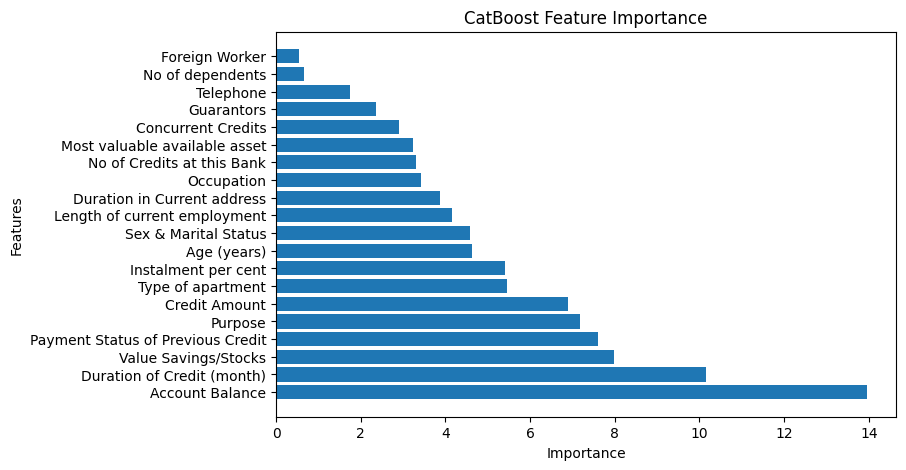

In [ ]:
train_accuracy = accuracy_score(y_train, y_train_pred_cb_with_cat)
test_accuracy = accuracy_score(y_test, y_test_pred_cb_with_cat)
print(f'Точность на тренировочной выборке: {train_accuracy:.3f}')
print(f'Точность на валидационной выборке: {test_accuracy:.3f}')
print()
train_recall = recall_score(y_train, y_train_pred_cb_with_cat)
test_recall = recall_score(y_test, y_test_pred_cb_with_cat)
print(f'Полнота на тренировочной выборке: {train_recall:.3f}')
print(f'Полнота на валидационной выборке: {test_recall:.3f}')
print()
train_f1 = f1_score(y_train, y_train_pred_cb_with_cat)
test_f1 = f1_score(y_test, y_test_pred_cb_with_cat)
print(f'F-мера на тренировочной выборке: {train_f1:.3f}')
print(f'F-мера на валидационной выборке: {test_f1:.3f}')
print()
train_roc_auc = roc_auc_score(y_train, y_train_pred_cb_with_cat)
test_roc_auc = roc_auc_score(y_test, y_test_pred_cb_with_cat)
print(f'ROC AUC на тренировочной выборке: {train_roc_auc:.3f}')
print(f'ROC AUC на валидационной выборке: {test_roc_auc:.3f}')
print()

cm = confusion_matrix(y_test, y_test_pred_cb_with_cat)
print('-' * 40)
print("Матрица ошибок:")
display(cm)
print()

tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred_cb_with_cat).ravel()
print('истинно отрицательные (True Negatives, TN)\t', tn)
print('ложно положительные (False Positives, FP)\t', fp)
print('ложно отрицательные (False Negatives, FN)\t', fn)
print('истинно положительные (True Positives, TP)\t', tp)
print()

# Получение важности признаков
importances = model_cb_with_cat.get_feature_importance(type='PredictionValuesChange')

# Создание pandas Series для удобства визуализации
feature_importances = pd.Series(importances, index=X_train.columns).sort_values(ascending=False)

# Визуализация важности признаков
plt.figure(figsize=(8, 5))
plt.barh(feature_importances.index, feature_importances.values)
plt.title('CatBoost Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

Отметим, что после добавления категориальных признаков на тренировочных данных метрики модели изменились незначительно.

На валидационных данных:
- точность возросла с 0.72 до 0.76,
- полнота уменьшилась с 0.94 до 0.90,
- F-мера возрасла с 0.83 до 0.84,
- ROC AUC вырос с 0.58 до 0.67.

Матрица ошибок показывает улучшение модели в определении отрицательных случаев, но при этом ухудшение положительных.

Самым важным признаком оказался `Account Balance`. `Duration of Credit (month)` - второй по важности, а `Credit Amount` замыкает шестерку наиболее важных признаков.

Таким образом, добавление категориальных признаков незначительно, но улучшило модель.

### Попытка оптимизировать гиперпараметры модели

In [ ]:
def objective(trial):
    # использует гиперпараметры, предложенные Optuna, для обучения модели CatBoostClassifier
    params = {
        "iterations": 1000,
        "learning_rate": trial.suggest_float("learning_rate", 1e-3, 0.1, log=True),
        "depth": trial.suggest_int("depth", 1, 10),
        "subsample": trial.suggest_float("subsample", 0.05, 1.0),
        "colsample_bylevel": trial.suggest_float("colsample_bylevel", 0.05, 1.0),
        "min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 1, 100),
    }

    model = CatBoostClassifier(**params, silent=True)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    rmse = mean_squared_error(y_test, predictions, squared=False)
    return rmse


# study используется для оптимизации функции objective с целью минимизации RMSE
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=30)

[I 2024-03-30 06:08:50,664] A new study created in memory with name: no-name-059b10c3-b71f-44a8-9494-2134f65d08a6
[I 2024-03-30 06:08:51,497] Trial 0 finished with value: 0.48579831205964474 and parameters: {'learning_rate': 0.04529412961260076, 'depth': 3, 'subsample': 0.49246493423712145, 'colsample_bylevel': 0.8595258084065421, 'min_data_in_leaf': 96}. Best is trial 0 with value: 0.48579831205964474.
[I 2024-03-30 06:08:52,271] Trial 1 finished with value: 0.4939635614091388 and parameters: {'learning_rate': 0.004125134529148226, 'depth': 3, 'subsample': 0.3329343262485561, 'colsample_bylevel': 0.6371393114516493, 'min_data_in_leaf': 100}. Best is trial 0 with value: 0.48579831205964474.
[I 2024-03-30 06:08:56,181] Trial 2 finished with value: 0.5019960159204453 and parameters: {'learning_rate': 0.03294801500598226, 'depth': 10, 'subsample': 0.5574716149162697, 'colsample_bylevel': 0.414621857802143, 'min_data_in_leaf': 97}. Best is trial 0 with value: 0.48579831205964474.
[I 2024-0

In [ ]:
# Получение лучших гиперпараметров
best_params = study.best_params
best_params

{'learning_rate': 0.018156381864795502,
 'depth': 5,
 'subsample': 0.7605288365539202,
 'colsample_bylevel': 0.2192698103384754,
 'min_data_in_leaf': 52}

In [ ]:
# Создание и обучение модели с лучшими гиперпараметрами
model_cb_opt = CatBoostClassifier(**best_params, verbose=False, random_state=42)
model_cb_opt.fit(X_train, y_train, verbose=False)

# Предсказание на тренировочной и валидационной выборках
y_train_pred_cb_opt = model_cb_opt.predict(X_train)
y_test_pred_cb_opt = model_cb_opt.predict(X_test)

#### Анализ полученного решения

Точность на тренировочной выборке: 0.976
Точность на валидационной выборке: 0.772

Полнота на тренировочной выборке: 0.998
Полнота на валидационной выборке: 0.869

F-мера на тренировочной выборке: 0.983
F-мера на валидационной выборке: 0.842

ROC AUC на тренировочной выборке: 0.961
ROC AUC на валидационной выборке: 0.708

----------------------------------------
Матрица ошибок:


array([[ 41,  34],
       [ 23, 152]])


истинно отрицательные (True Negatives, TN)	 41
ложно положительные (False Positives, FP)	 34
ложно отрицательные (False Negatives, FN)	 23
истинно положительные (True Positives, TP)	 152



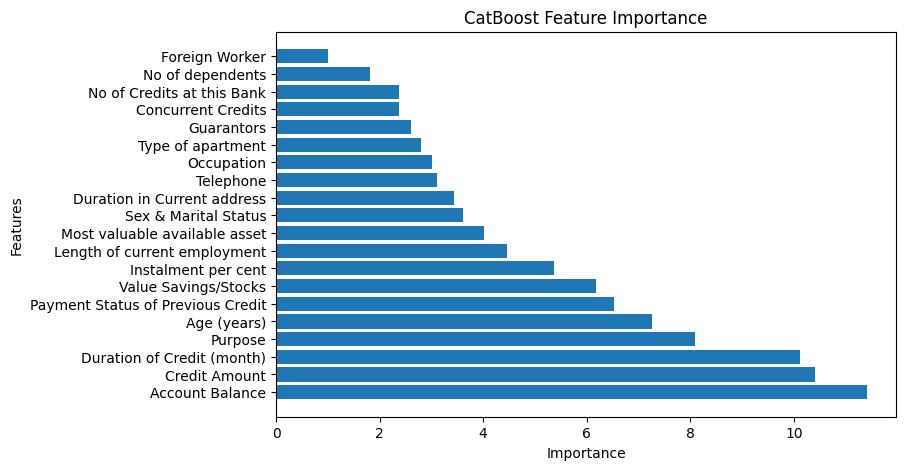

In [ ]:
train_accuracy = accuracy_score(y_train, y_train_pred_cb_opt)
test_accuracy = accuracy_score(y_test, y_test_pred_cb_opt)
print(f'Точность на тренировочной выборке: {train_accuracy:.3f}')
print(f'Точность на валидационной выборке: {test_accuracy:.3f}')
print()
train_recall = recall_score(y_train, y_train_pred_cb_opt)
test_recall = recall_score(y_test, y_test_pred_cb_opt)
print(f'Полнота на тренировочной выборке: {train_recall:.3f}')
print(f'Полнота на валидационной выборке: {test_recall:.3f}')
print()
train_f1 = f1_score(y_train, y_train_pred_cb_opt)
test_f1 = f1_score(y_test, y_test_pred_cb_opt)
print(f'F-мера на тренировочной выборке: {train_f1:.3f}')
print(f'F-мера на валидационной выборке: {test_f1:.3f}')
print()
train_roc_auc = roc_auc_score(y_train, y_train_pred_cb_opt)
test_roc_auc = roc_auc_score(y_test, y_test_pred_cb_opt)
print(f'ROC AUC на тренировочной выборке: {train_roc_auc:.3f}')
print(f'ROC AUC на валидационной выборке: {test_roc_auc:.3f}')
print()

cm = confusion_matrix(y_test, y_test_pred_cb_opt)
print('-' * 40)
print("Матрица ошибок:")
display(cm)
print()

tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred_cb_opt).ravel()
print('истинно отрицательные (True Negatives, TN)\t', tn)
print('ложно положительные (False Positives, FP)\t', fp)
print('ложно отрицательные (False Negatives, FN)\t', fn)
print('истинно положительные (True Positives, TP)\t', tp)
print()

# Получение важности признаков
importances = model_cb_opt.get_feature_importance(type='PredictionValuesChange')

# Создание pandas Series для удобства визуализации
feature_importances = pd.Series(importances, index=X_train.columns).sort_values(ascending=False)

# Визуализация важности признаков
plt.figure(figsize=(8, 5))
plt.barh(feature_importances.index, feature_importances.values)
plt.title('CatBoost Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

Проведенная довольно быстрая оптимизация не привела к значительным улучшением метрик модели на валидационных данных:
- точность возросла с 0.76 до 0.77,
- полнота уменьшилась с 0.90 до 0.87,
- F-мера осталась 0.84,
- ROC AUC вырос с 0.67 до 0.71.

Матрица ошибок показывает еще большее улучшение модели в определении отрицательных случаев, и еще большее ухудшение положительных.

Претерпела изменение тройка самых важных признаков:
1. `Account Balance`,
2. `Credit Amount`,
3. `Duration of Credit (month)`.

Обратим внимание, что возраст стал играть немаловожную роль в принятии решения моделью.

## Текущие выводы

Таким образом добавление в модель sklearn категориальных признаков значительно улучшило ее.

В случае же с CatBoost улучшение незначительно.

Проведенная наспех оптимизация не привела к значимым улучшениям, можно даже говорить об ухудшении результатов в обоих случаях.

Можно предположить, что требуется более глубокая затратная по времени оптимизация параметров.

Также можно заявить, что работа обеих моделей с параметрами по умолчанию дает хорошие результаты.

# Сравнение выбранных ансамблевых моделей

## между собой

Производительность: `CatBoostClassifier` показывает более высокую точность и полноту на тренировочных данных по сравнению с `HistGradientBoostingClassifier`. Однако, на валидационных данных производительность `CatBoostClassifier` снижается, что может указывать на переобучение.

Важность признаков: Для `HistGradientBoostingClassifier` наиболее важными признаками являются "Duration of Credit (month)" и "Credit Amount", в то время как для `CatBoostClassifier` - "Account Balance" и "Credit Amount". Это указывает на различия в подходах моделей к выбору наиболее важных признаков.

Распределение ошибок: Обе модели показывают схожую тенденцию к ошибкам в предсказании отрицательных случаев, но `CatBoostClassifier` лучше справляется с положительными случаями.

## с метод опорных векторов SVC из первого домашнего задания

Производительность: `CatBoostClassifier` показывает более высокую точность и полноту на тренировочных данных по сравнению с `HistGradientBoostingClassifier` и `SVC`. Однако, на валидационных данных производительность `CatBoostClassifier` снижается, что может указывать на переобучение. `HistGradientBoostingClassifier` показывает более стабильную производительность, но с меньшей точностью и полнотой на валидационных данных. `SVC` показывает наиболее низкую производительность по сравнению с двумя ансамблевыми моделями.

Важность признаков: Для `HistGradientBoostingClassifier` наиболее важными признаками являются "Duration of Credit (month)" и "Credit Amount", в то время как для `CatBoostClassifier` - "Account Balance" и "Credit Amount". `SVC` не предоставляет информацию о важности признаков напрямую, но его производительность потенциально может быть улучшена с помощью выбора наиболее важных признаков.

Распределение ошибок: `SVC` показывает наиболее высокую полноту, но низкую точность и F-меру, что указывает на проблемы с балансом между классами. `HistGradientBoostingClassifier` и `CatBoostClassifier` показывают более сбалансированное распределение ошибок, но с различными показателями производительности.